<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Car Acceptability Dataset

*   buying: buying price
*   maint: price of the maintenance
*   doors: number of doors
*   persons: capacity in terms of persons to carry
*   lug_boot: the size of luggage boot
*   safety: estimated safety of the car
*   class: unacceptable, acceptable, good, very good

In [121]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### Rename column names

We can see that the dataset does not have proper column names.

In [123]:
# rename columns
#col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
#df.columns = col_names
#df.head()

We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [125]:
# Get all column names from the dataframe
col_names = df.columns.tolist()

# Exclude non-categorical columns (e.g., 'ID', 'Age', 'Coffee_Intake', etc.)
# You might need to adjust this list based on which columns you consider categorical
categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in categorical_cols:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64


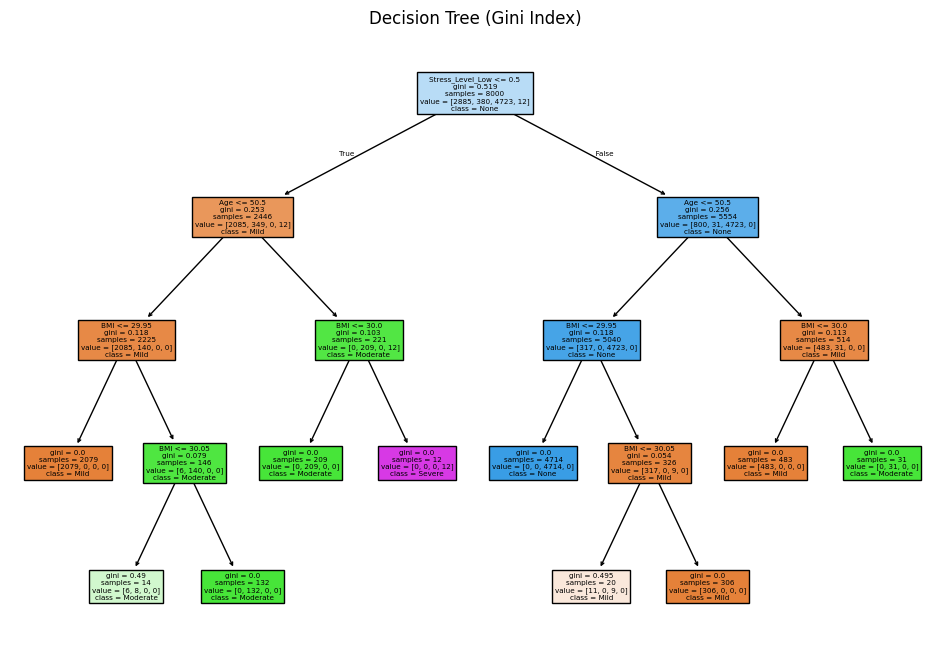

In [126]:
# Visualize the decision tree with gini index
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names=X.columns, class_names=clf_gini.classes_.tolist(), filled=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

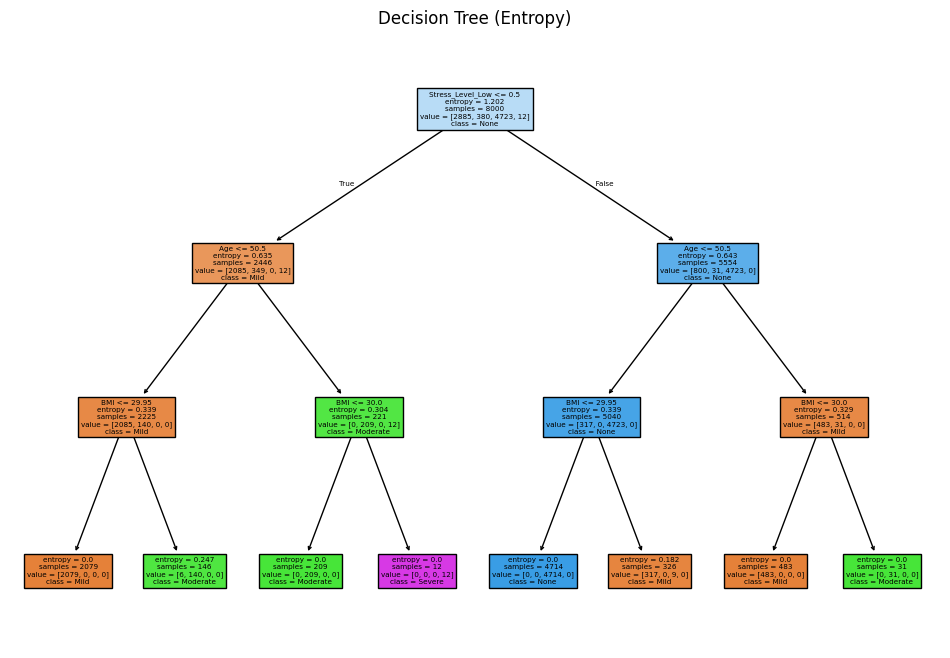

In [127]:
# Visualize the decision tree with entropy
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train), feature_names=X.columns, class_names=clf_en.classes_.tolist(), filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

In [128]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8000, 39)
Shape of X_test: (2000, 39)


In [129]:
# DECISION TREE GINI
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print("Classification Report (Decision Tree Gini):")
print(classification_report(y_test, y_pred_gini))

Model accuracy score with criterion gini index: 0.9965
Classification Report (Decision Tree Gini):
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       694
    Moderate       0.99      0.99      0.99        83
        None       1.00      1.00      1.00      1218
      Severe       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [130]:
# DECISION TREE ENTROPY
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print("Classification Report (Decision Tree Entropy):")
print(classification_report(y_test, y_pred_en))

Model accuracy score with criterion entropy: 0.9965
Classification Report (Decision Tree Entropy):
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       694
    Moderate       0.99      0.99      0.99        83
        None       1.00      1.00      1.00      1218
      Severe       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [131]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Model accuracy score with naive bayes: 0.7535
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

        Mild       0.92      0.37      0.53       694
    Moderate       0.19      0.36      0.25        83
        None       0.85      1.00      0.92      1218
      Severe       0.02      0.60      0.04         5

    accuracy                           0.75      2000
   macro avg       0.50      0.58      0.44      2000
weighted avg       0.84      0.75      0.75      2000



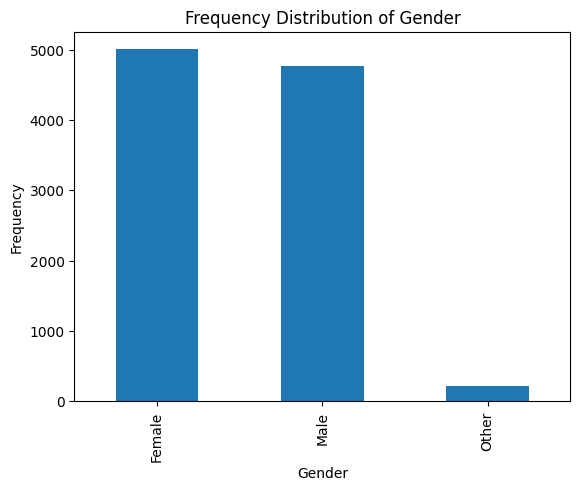

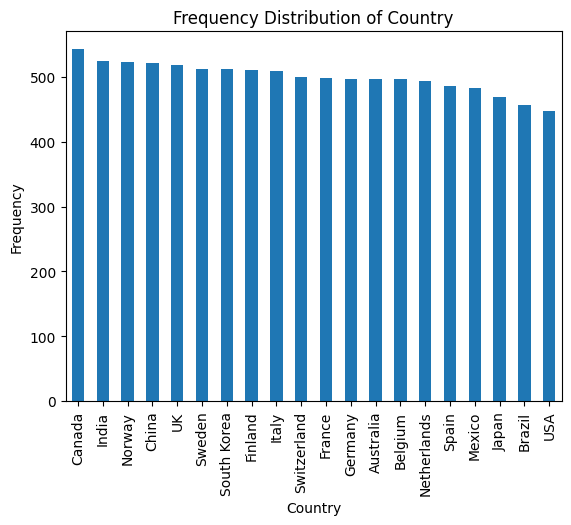

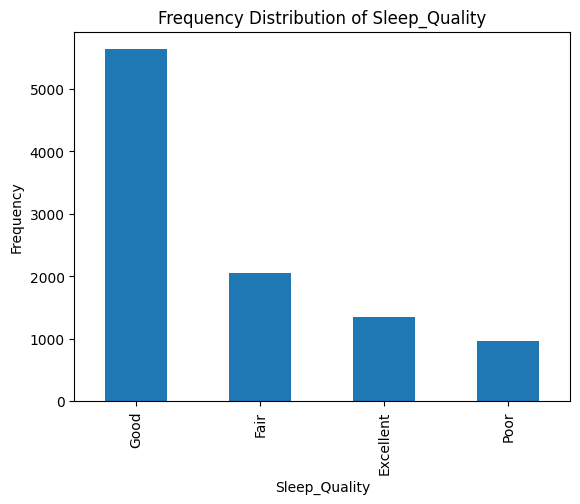

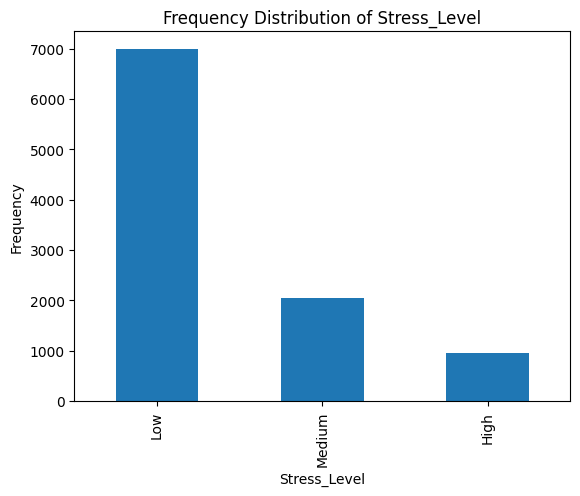

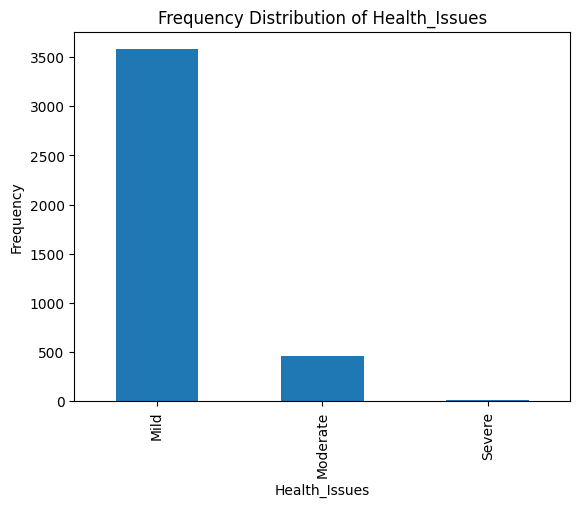

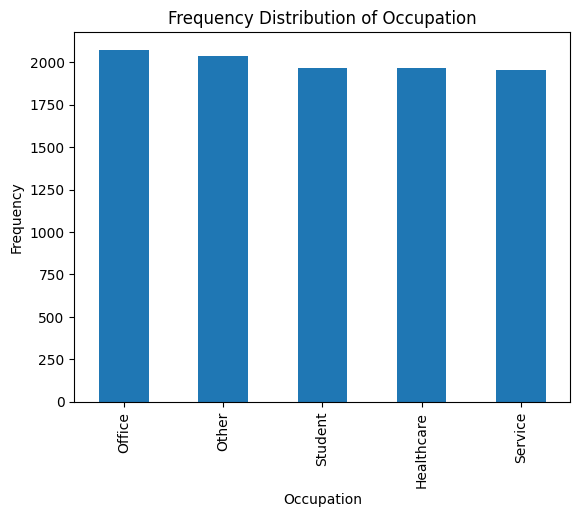

In [132]:
# Get all column names from the dataframe
col_names = df.columns.tolist()

# Exclude non-categorical columns (e.g., 'ID', 'Age', 'Coffee_Intake', etc.)
# You might need to adjust this list based on which columns you consider categorical
categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in categorical_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

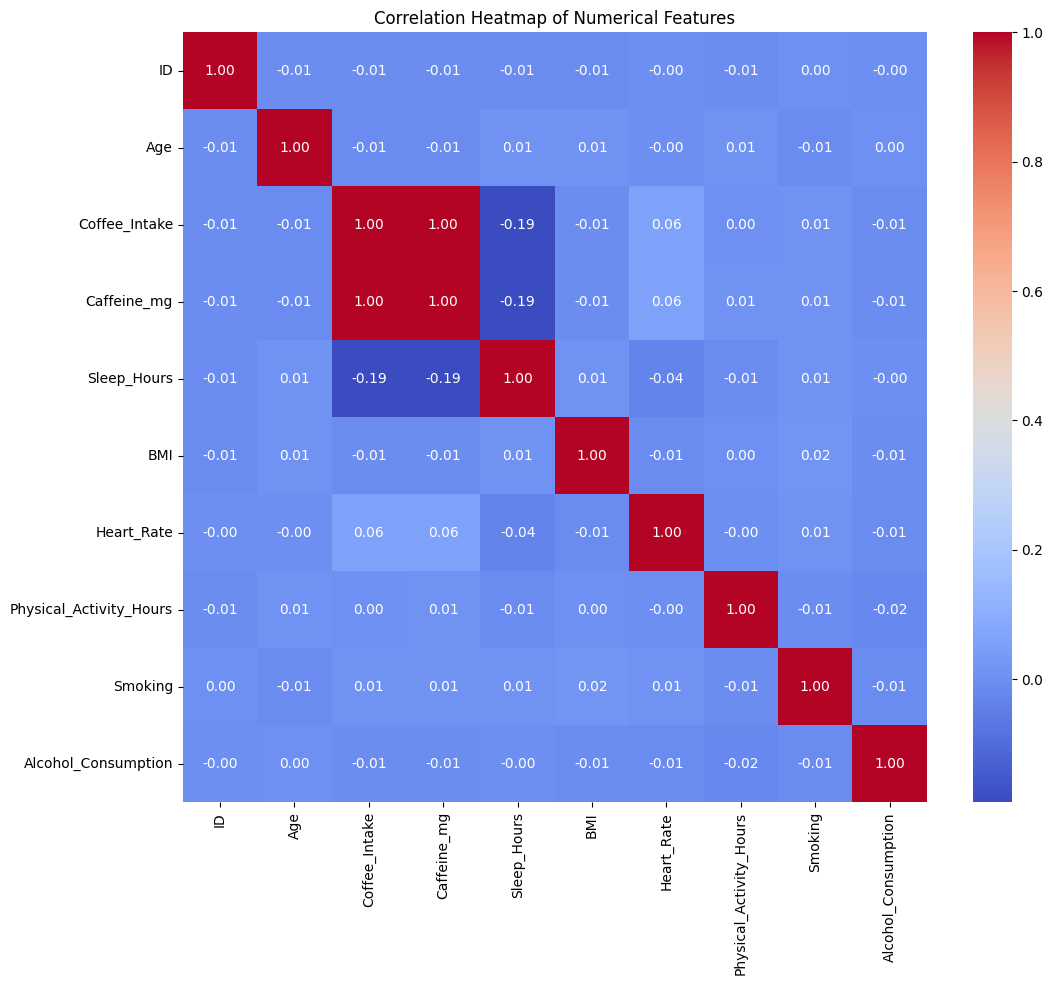

In [162]:
# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Explore `Health_Issues` variable

In [133]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
Mild,3579
Moderate,463
Severe,17


The `class` target variable is ordinal in nature.

### Missing values in variables

In [134]:
# check missing values in variables

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


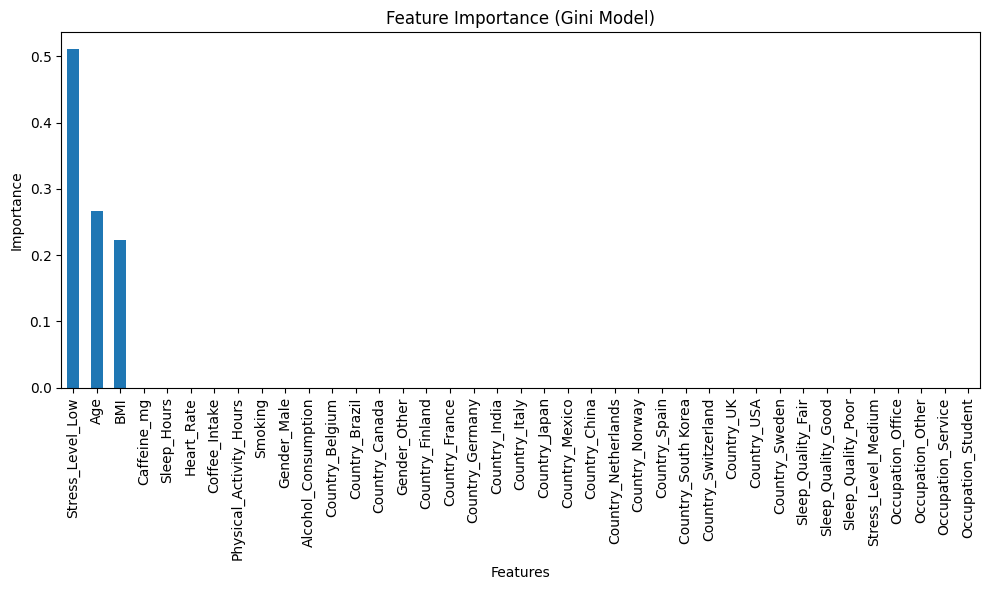

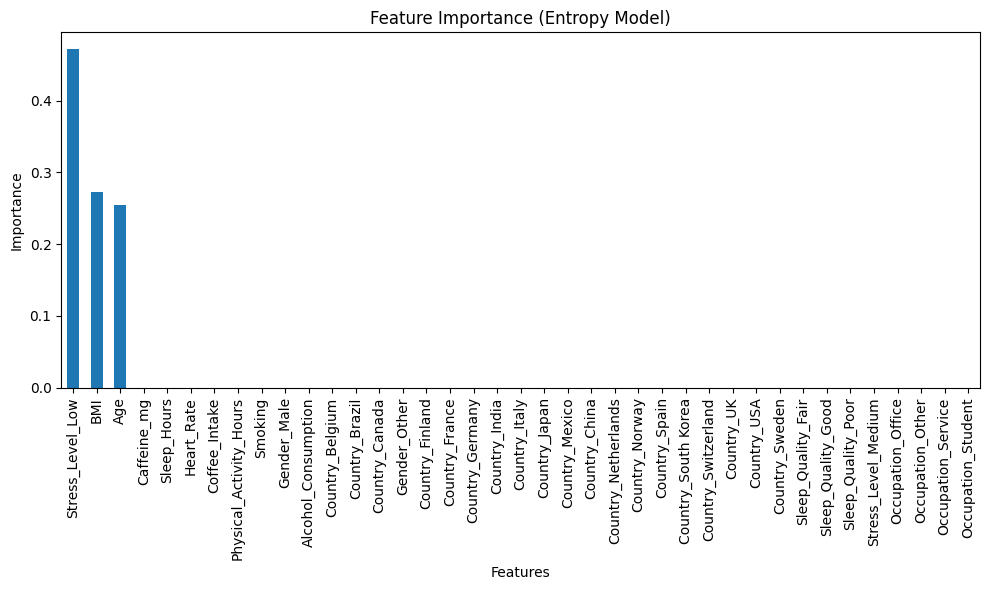

In [135]:
# Visualize feature importance for Gini model
plt.figure(figsize=(10, 6))
feature_importances_gini.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Gini Model)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize feature importance for Entropy model
plt.figure(figsize=(10, 6))
feature_importances_en.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Entropy Model)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [136]:
# Get feature importance from the Gini model
feature_importances_gini = pd.Series(clf_gini.feature_importances_, index=X_train.columns)
print("Feature Importance (Gini Model):")
print(feature_importances_gini.sort_values(ascending=False))

# Get feature importance from the Entropy model
feature_importances_en = pd.Series(clf_en.feature_importances_, index=X_train.columns)
print("\nFeature Importance (Entropy Model):")
print(feature_importances_en.sort_values(ascending=False))

Feature Importance (Gini Model):
Stress_Level_Low           0.510600
Age                        0.266815
BMI                        0.222585
Caffeine_mg                0.000000
Sleep_Hours                0.000000
Heart_Rate                 0.000000
Coffee_Intake              0.000000
Physical_Activity_Hours    0.000000
Smoking                    0.000000
Gender_Male                0.000000
Alcohol_Consumption        0.000000
Country_Belgium            0.000000
Country_Brazil             0.000000
Country_Canada             0.000000
Gender_Other               0.000000
Country_Finland            0.000000
Country_France             0.000000
Country_Germany            0.000000
Country_India              0.000000
Country_Italy              0.000000
Country_Japan              0.000000
Country_Mexico             0.000000
Country_China              0.000000
Country_Netherlands        0.000000
Country_Norway             0.000000
Country_Spain              0.000000
Country_South Korea        0.00

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

We can see that all  the variables are ordinal categorical data type.

### Encode categorical variables


Now, I will encode the categorical variables.

In [137]:
# Select categorical columns to encode
categorical_cols_to_encode = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for column in categorical_cols_to_encode:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
[nan 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


In [138]:
# The current dataset has different categorical columns and they are not ordinal.
# We need to use one-hot encoding for these nominal categorical variables.

# Select nominal categorical columns to encode
nominal_categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_categorical_cols, drop_first=True)

# For 'Health_Issues' which has missing values and might be considered ordinal,
# we can handle it separately. For now, let's just see its unique values.
print("Unique values in Health_Issues:", df_encoded['Health_Issues'].unique())

# Display the first few rows of the encoded dataframe
display(df_encoded.head())

Unique values in Health_Issues: [nan 'Mild' 'Moderate' 'Severe']


,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Health_Issues,Smoking,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,3.5,328.1,7.5,24.9,78,14.5,NaN,0,...,False,False,True,False,True,False,False,True,False,False
1,2,33,1.0,94.1,6.2,20.0,67,11.0,NaN,0,...,False,False,True,False,True,False,False,False,True,False
2,3,42,5.3,503.7,5.9,22.7,59,11.2,Mild,0,...,False,True,False,False,False,True,True,False,False,False
3,4,53,2.6,249.2,7.3,24.7,71,6.6,Mild,0,...,False,False,True,False,True,False,False,True,False,False
4,5,32,3.1,298.0,5.3,24.1,76,8.5,Mild,0,...,False,True,False,False,False,True,False,False,False,True


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [139]:
# The target variable is 'Health_Issues'. We should separate it.
# Also, the 'ID' column is not a feature.
X = df_encoded.drop(['Health_Issues', 'ID'], axis=1)

# We will use 'Health_Issues' as the target variable.
# Since it has missing values, we will replace NaN with "None".
y = df_encoded['Health_Issues'].fillna('None')

In [140]:
X.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,24.9,78,14.5,0,0,True,...,False,False,True,False,True,False,False,True,False,False
1,33,1.0,94.1,6.2,20.0,67,11.0,0,0,True,...,False,False,True,False,True,False,False,False,True,False
2,42,5.3,503.7,5.9,22.7,59,11.2,0,0,True,...,False,True,False,False,False,True,True,False,False,False
3,53,2.6,249.2,7.3,24.7,71,6.6,0,0,True,...,False,False,True,False,True,False,False,True,False,False
4,32,3.1,298.0,5.3,24.1,76,8.5,0,1,False,...,False,True,False,False,False,True,False,False,False,True


In [141]:
y.head()

,Health_Issues
0,None
1,None
2,Mild
3,Mild
4,Mild


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [142]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [143]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 39), (2000, 39))

In [144]:
X_train.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
9254,37,4.3,405.6,5.4,18.0,86,2.4,0,1,True,...,False,True,False,False,False,True,False,False,True,False
1561,26,0.0,0.0,5.5,28.3,75,10.8,0,0,True,...,False,True,False,False,False,True,False,True,False,False
1670,32,2.8,268.1,7.3,27.4,69,8.6,0,0,True,...,False,False,True,False,True,False,True,False,False,False
6087,18,2.2,208.6,8.1,16.3,83,8.9,0,1,True,...,False,False,False,False,True,False,False,True,False,False
6669,43,2.6,251.1,9.4,25.4,68,3.4,0,0,False,...,False,False,False,False,True,False,True,False,False,False


In [145]:
X_test.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
6252,66,2.6,245.9,6.7,30.1,76,1.9,0,1,True,...,False,False,True,False,True,False,False,False,True,False
4684,22,3.1,293.1,7.6,20.4,69,5.0,0,0,False,...,False,False,True,False,True,False,False,False,True,False
1731,30,3.9,372.4,6.4,27.5,75,13.8,0,0,True,...,False,False,True,False,True,False,True,False,False,False
4742,35,1.0,92.5,5.3,23.1,71,2.4,0,0,True,...,False,True,False,False,False,True,False,False,True,False
4521,47,1.3,119.0,6.9,28.4,64,9.6,1,0,True,...,False,False,True,False,True,False,True,False,False,False


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [146]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [147]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [148]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [149]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[33] <= 0.5\ngini = 0.519\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[4] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[4] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[4] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[4] <= 29.9

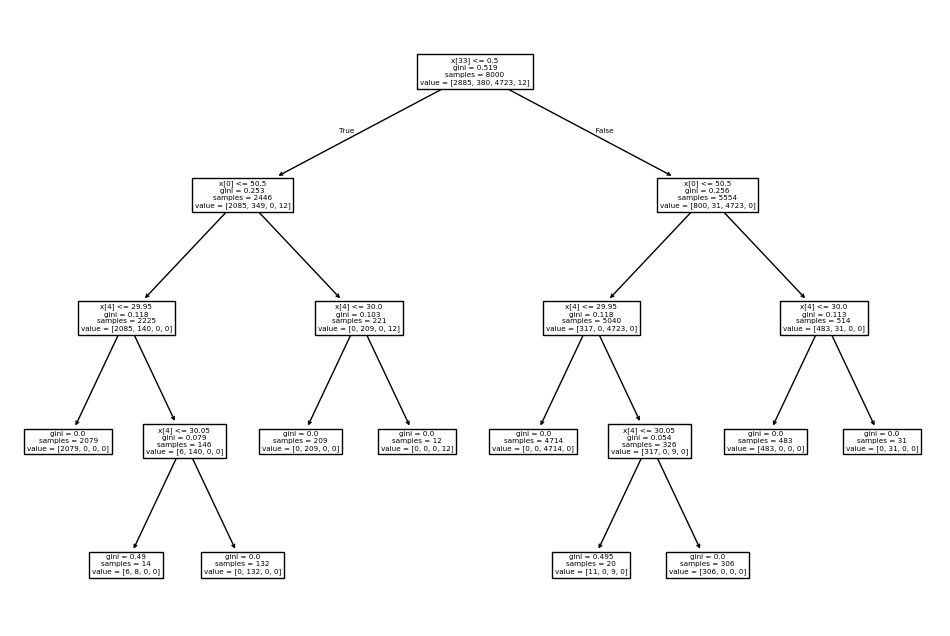

In [150]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [151]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [152]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [153]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[33] <= 0.5\nentropy = 1.202\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.375, 0.375, 'x[4] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [317, 0, 4723, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsampl

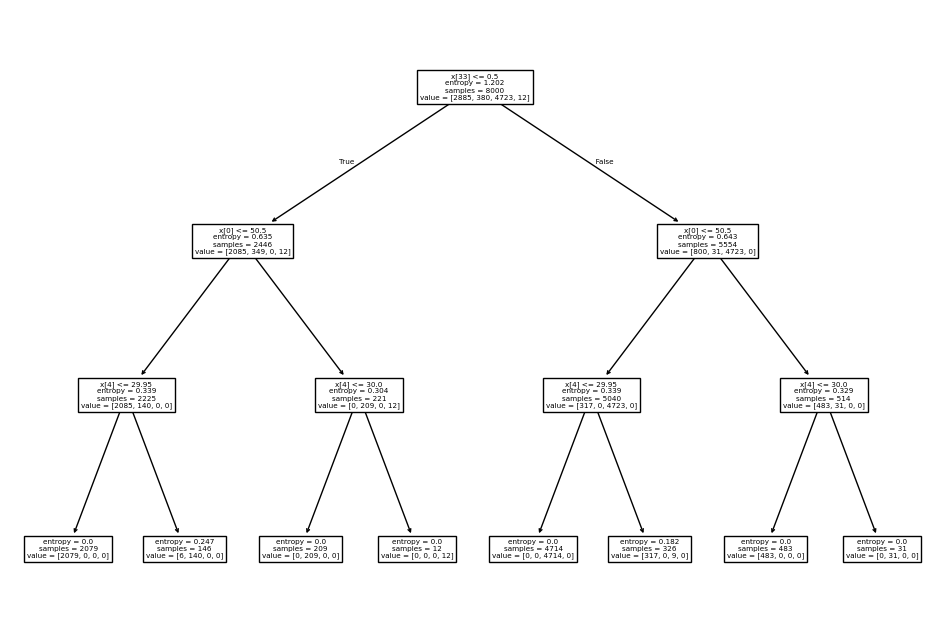

In [154]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [163]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [164]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [165]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.7535


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [158]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       694
    Moderate       0.99      0.99      0.99        83
        None       1.00      1.00      1.00      1218
      Severe       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [159]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       694
    Moderate       0.99      0.99      0.99        83
        None       1.00      1.00      1.00      1218
      Severe       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [160]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        Mild       0.92      0.37      0.53       694
    Moderate       0.19      0.36      0.25        83
        None       0.85      1.00      0.92      1218
      Severe       0.02      0.60      0.04         5

    accuracy                           0.75      2000
   macro avg       0.50      0.58      0.44      2000
weighted avg       0.84      0.75      0.75      2000



In [167]:
# Make a prediction with the gini index model

# To make a prediction, you need to create an input DataFrame with the same columns as the training data (X_train) after one-hot encoding.
# We'll use the first row of the original dataframe as an example input.
example_input_df = df.iloc[[0]].copy()

# Apply the same one-hot encoding as was applied to the training data
nominal_categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']
example_input_encoded = pd.get_dummies(example_input_df, columns=nominal_categorical_cols, drop_first=True)

# Drop 'Health_Issues' and 'ID' as these are not features for prediction
example_input_encoded = example_input_encoded.drop(['Health_Issues', 'ID'], axis=1)

# Reindex the example input to match the columns of X_train.
# This is crucial to ensure the input data has the same columns and order as the training data.
example_input_aligned = example_input_encoded.reindex(columns=X_train.columns, fill_value=0)


# Make the prediction using the trained Gini model
prediction_gini = clf_gini.predict(example_input_aligned)

print("Prediction :", prediction_gini[0])


Prediction : Mild
